<a href="https://colab.research.google.com/github/sonika-07/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **1. Importing libraries**

In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import datetime

# Importing Models libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Loading the Play store dataset**

In [3]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = "ISO-8859-1")

## **3. Dataset OverView**

In [ ]:
# Dataset First Look
df.head()          #Top 5 rows 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()   #bottom 5 rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df['Date'].duplicated().any()

True

In [ ]:
df.Date.value_counts()

01-12-2017    24
09-08-2018    24
07-08-2018    24
06-08-2018    24
05-08-2018    24
              ..
31-03-2018    24
30-03-2018    24
29-03-2018    24
28-03-2018    24
30-11-2018    24
Name: Date, Length: 365, dtype: int64

Here we have Dataset of one year with 24 hours.
let's see if we have more than 24 hrs of any day.

In [4]:
#see the unique values of hour
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

So here we have data of 24 hrs of each day of the year.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

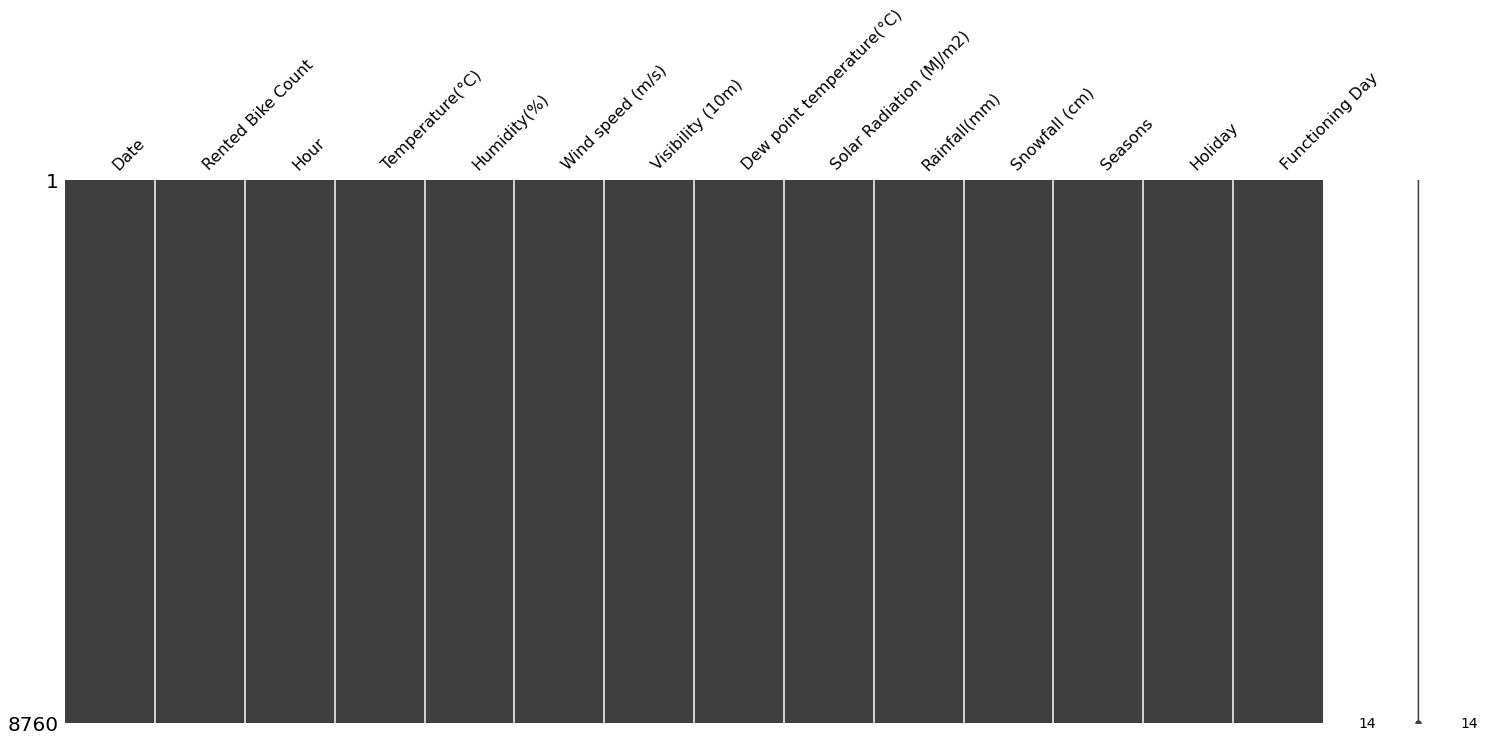

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)

We can see that there are no missing values in our dataset

## **4. Understanding Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [5]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01-12-2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


All the statistical information is available for each variable.

We have 3 categorical columns. Let's find out unique values for each categorical column.

### Check Unique Values for each variable.

In [ ]:
# Checking Unique Values for seasons
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

There are four seasons in a year and for each season the dataset is available.

In [ ]:
## Checking Unique Values for holiday
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

There are two unique values for holiday column : Holiday or No Holiday
8328 data is no holiday, i.e., 347days while 432 data is holiday, i.e., 18 days.

In [ ]:
# Checking Unique Values for functionig day
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Two unique values for Functioning day.

## 5. **Data Wrangling**

### 1. Changing the 'Date' data type to datetime

In [6]:
df['Date']= pd.to_datetime(df['Date'])

###2. Creating column for number of month and find if it's weekend or not 

In [7]:
#extracting month and weekend
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

Other columns do not require changes. So let's proceed 

##**6. Data Understanding**

In [9]:
#list of numerical column
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend'],
      dtype='object')

###4.1 Univariate Analysis

In [ ]:
#Distribution plot
for col in num_col.columns:
  sns.distplot(df[col])
  plt.show()

Here it is clearly visible that None of the columns is normally distributed.

Let's check if mean and median are on same axis or not.

In [ ]:
#Histogram
for col in num_col[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

Rented bike count which is dependent variable is positively skewed.

In [16]:
#Boxplot
#Checking for outliers
for col in num_col:
  sns.boxplot(x=col,data=df)
  plt.show()

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>

KeyError: ignored

<Figure size 432x288 with 1 Axes>